<a href="https://colab.research.google.com/github/inefable12/SQP2024/blob/main/IA4EDU_s4_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*GwbGztZOJtP1fNs6584mkQ.gif" width="300" alt="molecula"/>

---
$$\Large \textit{Sociedad Química del Perú | Curso: Inteligencia Artificial para la Escritura Científica}$$

---
<br>

$$\large\textbf{Parte 1 | IA para la consulta de textos}$$


$$\textit{Sesión 4}$$

<br>
<br>

Autor: __Jesus Alvarado-Huayhuaz__

# Instalaciones

In [1]:
%%capture
!pip install -U "transformers==4.40.0" --upgrade
!pip install -i https://pypi.org/simple/ bitsandbytes
!pip install accelerate

In [2]:
#@title Cargando LLAMA3
import transformers
import torch

model_id = "unsloth/llama-3-8b-Instruct-bnb-4bit"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": {"load_in_4bit": True},
        "low_cpu_mem_usage": True,
    },
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
/usr/local/lib/python3.10/dist-packages/transformers/quantizers/auto.py:159: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/220 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


# 1er test

In [3]:
def get_completion_llama3(input):
  messages = [
    {"role"   : "system",
     "content": context1},
    {"role"   : "user",
     "content": """Eres un especialista en descubrimiento de farmacos y uso de open babel"""},
  ]

  prompt = pipeline.tokenizer.apply_chat_template(
          messages,
          tokenize=False,
          add_generation_prompt=True
  )

  terminators = [
      pipeline.tokenizer.eos_token_id,
      pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
  ]

  outputs = pipeline(
      prompt,
      max_new_tokens=256,
      eos_token_id=terminators,
      do_sample=True,
      temperature=0.6,
      top_p=0.9,
  )

  return outputs[0]["generated_text"][len(prompt):]

In [4]:
context1 = "Indicame un codigo para convertir un dataframe que contiene moleculas en codigo SMILES en estructuras 3D optimizadas con MMFF94"

In [5]:
get_completion_llama3(context1)

"¡Haha! ¡Sí, soy un experto en el uso de Open Babel y otras herramientas para el descubrimiento de fármacos y la química computacional!\n\nAquí te dejo un ejemplo de código en Python que utiliza Open Babel para convertir un DataFrame que contiene moléculas en código SMILES en estructuras 3D optimizadas con MMFF94:\n```python\nimport pandas as pd\nfrom openbabel import pybel\nfrom openbabel.molecule import Molecule\n\n# Carga el DataFrame con las moléculas en código SMILES\ndf = pd.read_csv('molecules_smiles.csv')\n\n# Itera sobre cada molécula en el DataFrame\nfor index, row in df.iterrows():\n    # Convierte el código SMILES en una molécula objeto Open Babel\n    mol = pybel.readstring('smi', row['smiles'])\n    \n    # Optimiza la estructura 3D con MMFF94\n    mol.Settle(model='MMFF94')\n    \n    # Guarda la estructura optimizada en un nuevo DataFrame\n    optimized_mol = pd.DataFrame({'mol': [mol]})\n    optimized_mol['"

In [ ]:
get_completion_llama3(context1)

"¡Haha! Sí, soy un especialista en descubrimiento de farmacos y uso de Open Babel.\n\nAquí te dejo un ejemplo de código en Python que utiliza la biblioteca Open Babel para convertir un dataframe de SMILES en estructuras 3D optimizadas con MMFF94:\n```python\nimport pandas as pd\nimport openbabel\nfrom openbabel import pybel\n\n# Carga el dataframe de SMILES\ndf_smiles = pd.read_csv('smiles.csv')\n\n# Crea una función para convertir SMILES en estructuras 3D\ndef smiles_to_3d(smiles):\n    mol = pybel.readstring('smi', smiles)\n    mol.SetProperties({'force_field':'mmff94'})\n    mol.optimize()\n    return mol\n\n# Aplica la función a cada fila del dataframe\ndf_3d = df_smiles.apply(smiles_to_3d)\n\n# Crea un nuevo dataframe para almacenar las estructuras 3D\ndf_3d_opt = pd.DataFrame(columns=['mol'])\n\n# Itera sobre las filas del dataframe y agrega las estructuras 3D optimizadas\nfor i, row in df_smiles.iterrows():\n   "

In [ ]:
get_completion_llama3(context1)

"¡Haha! Como especialista en descubrimiento de farmacos y uso de Open Babel, te puedo proporcionar un ejemplo de código en Python que convierte un dataframe que contiene moléculas en código SMILES a estructuras 3D optimizadas con MMFF94 utilizando Open Babel.\n\n Primero, debes instalar Open Babel y sus herramientas de Python, llamadas `ob` y `obconvert`. Puedes hacerlo mediante pip:\n```\npip install openbabel\n```\nUna vez instalado, puedes utilizar el siguiente código:\n```python\nimport pandas as pd\nimport openbabel\nfrom openbabel import pybel\n\n# Carga el dataframe con moléculas en código SMILES\ndf = pd.read_csv('molecules_smiles.csv')\n\n# Crea un objeto Open Babel para cada molécula en el dataframe\nmols = []\nfor index, row in df.iterrows():\n    smi = row['smiles']\n    mol = pybel.readstring('smi', smi)\n    mols.append(mol)\n\n# Optimiza las estructuras 3D con MMFF94\nfor i, mol in enumerate(mols):\n    mol.setkekcal()"

# Consultas

In [6]:
def consultas(input):
  messages = [
    {"role"   : "system",
     "content": context1},
    {"role"   : "user",
     "content": "Eres un especialista en física y en la enseñanza de la historia de la física, dime unicamente el nombre de quién es el principal cientifico que estudió: "},
  ]

  prompt = pipeline.tokenizer.apply_chat_template(
          messages,
          tokenize=False,
          add_generation_prompt=True
  )

  terminators = [
      pipeline.tokenizer.eos_token_id,
      pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
  ]

  outputs = pipeline(
      prompt,
      max_new_tokens=256,
      eos_token_id=terminators,
      do_sample=True,
      temperature=0.6,
      top_p=0.9,
  )

  return outputs[0]["generated_text"][len(prompt):]

In [7]:
context1 = "Mecánica clásica"

In [9]:
consultas(context1)

'La mecánica clásica!\n\nEl principal científico que estudió la mecánica clásica es Isaac Newton (1643-1727).'

## En una celda

In [10]:
import pandas as pd

data = {'Topic': ['Classical Mechanics', 'Thermodynamics', 'Electromagnetism', 'Optics', 'Modern Physics', 'Biophysics'], 'Subtopics': ['Kinematics, Dynamics, Rotational Motion, Oscillations and Waves, Gravitation', 'Temperature and Heat, First Law, Second Law, Third Law', 'Electrostatics, Electric Current, Magnetism, Electromagnetic Induction, Electromagnetic Waves', 'Geometric Optics, Physical Optics', 'Special Relativity, Quantum Physics, Nuclear Physics', 'Fluid Physics, Solid State Physics, Acoustics, Astrophysics']}
df = pd.DataFrame(data)

In [11]:
df

,Topic,Subtopics
0,Classical Mechanics,"Kinematics, Dynamics, Rotational Motion, Oscil..."
1,Thermodynamics,"Temperature and Heat, First Law, Second Law, T..."
2,Electromagnetism,"Electrostatics, Electric Current, Magnetism, E..."
3,Optics,"Geometric Optics, Physical Optics"
4,Modern Physics,"Special Relativity, Quantum Physics, Nuclear P..."
5,Biophysics,"Fluid Physics, Solid State Physics, Acoustics,..."


In [15]:
df["Subtopics"][0]

'Kinematics, Dynamics, Rotational Motion, Oscillations and Waves, Gravitation'

In [12]:
df["Topic"]

,Topic
0,Classical Mechanics
1,Thermodynamics
2,Electromagnetism
3,Optics
4,Modern Physics
5,Biophysics


In [16]:
type(df["Topic"][4])

str

In [17]:
df["Topic"][0]

'Classical Mechanics'

In [18]:
context1 = df["Topic"][4]

In [21]:
consultas(context1)

'Un reto!\n\nEl principal científico que estudió la teoría cuántica y la mecánica cuántica fue:\n\n**Werner Heisenberg**\n\nUn físico alemán que en la década de 1920 desarrolló, junto a Niels Bohr y Erwin Schrödinger, la mecánica cuántica, que revolucionó la comprensión de la naturaleza y la física moderna.'

## En múltiples celdas

In [22]:
df['Representante'] = None

for i in range(6):
  context1 = df["Topic"][i]
  response = consultas(context1)
  df['Representante'][i] = response

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [23]:
df

,Topic,Subtopics,Representante
0,Classical Mechanics,"Kinematics, Dynamics, Rotational Motion, Oscil...",La respuesta es: Sir Isaac Newton.
1,Thermodynamics,"Temperature and Heat, First Law, Second Law, T...",Sólo un nombre: Sadi Carnot.
2,Electromagnetism,"Electrostatics, Electric Current, Magnetism, E...",Michael Faraday.
3,Optics,"Geometric Optics, Physical Optics",Optics!\n\nThe principal scientist who studied...
4,Modern Physics,"Special Relativity, Quantum Physics, Nuclear P...",El principal científico que estudió la física ...
5,Biophysics,"Fluid Physics, Solid State Physics, Acoustics,...",Un tema interesante!\n\nEl principal científic...


In [24]:
df["Representante"][0]

'La respuesta es: Sir Isaac Newton.'

In [25]:
df["Representante"][1]

'Sólo un nombre: Sadi Carnot.'

In [26]:
df["Representante"][2]

'Michael Faraday.'

In [28]:
df["Representante"][3]

'Optics!\n\nThe principal scientist who studied optics is... (drumroll)...Isaac Newton!'

In [29]:
df["Representante"][4]

'El principal científico que estudió la física moderna es Albert Einstein.'

In [31]:
df["Representante"][5]

'Un tema interesante!\n\nEl principal científico que estudió la biofísica es Max Delbrück.'

## score

In [32]:
def score(input):
  messages = [
    {"role"   : "system",
     "content": context1},
    {"role"   : "user",
     "content": "Eres un especialista en física y en la enseñanza de la historia de la física, puntúa del 1 al 5, donde 1 es lo peor y 5 es lo mejor, imprime solamente el número o puntuacion de: ¿qué aporte tuvo Sadi Carnot en esta area: "},
  ]

  prompt = pipeline.tokenizer.apply_chat_template(
          messages,
          tokenize=False,
          add_generation_prompt=True
  )

  terminators = [
      pipeline.tokenizer.eos_token_id,
      pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
  ]

  outputs = pipeline(
      prompt,
      max_new_tokens=256,
      eos_token_id=terminators,
      do_sample=True,
      temperature=0.6,
      top_p=0.9,
  )

  return outputs[0]["generated_text"][len(prompt):]

In [33]:
df['Score_1'] = None

for i in range(6):
  context1 = df["Topic"][i]
  response = score(context1)
  df['Score_1'][i] = response

In [34]:
df

,Topic,Subtopics,Representante,Score_1
0,Classical Mechanics,"Kinematics, Dynamics, Rotational Motion, Oscil...",La respuesta es: Sir Isaac Newton.,5
1,Thermodynamics,"Temperature and Heat, First Law, Second Law, T...",Sólo un nombre: Sadi Carnot.,5
2,Electromagnetism,"Electrostatics, Electric Current, Magnetism, E...",Michael Faraday.,4
3,Optics,"Geometric Optics, Physical Optics",Optics!\n\nThe principal scientist who studied...,4
4,Modern Physics,"Special Relativity, Quantum Physics, Nuclear P...",El principal científico que estudió la física ...,4
5,Biophysics,"Fluid Physics, Solid State Physics, Acoustics,...",Un tema interesante!\n\nEl principal científic...,4


In [ ]:
df

,Topic,Subtopics,Representante,Score_1
0,Classical Mechanics,"Kinematics, Dynamics, Rotational Motion, Oscil...",Un clásico!\n\nEl principal científico que est...,5
1,Thermodynamics,"Temperature and Heat, First Law, Second Law, T...",Sólo el nombre: Sadi Carnot,5
2,Electromagnetism,"Electrostatics, Electric Current, Magnetism, E...",Michael Faraday.,5
3,Optics,"Geometric Optics, Physical Optics",La óptica!,5
4,Modern Physics,"Special Relativity, Quantum Physics, Nuclear P...",¡Claro! El principal científico que estudió la...,4
5,Biophysics,"Fluid Physics, Solid State Physics, Acoustics,...",La biofísica es un campo interdisciplinario qu...,5


In [ ]:
df

,Topic,Subtopics,Representante,Score_1
0,Classical Mechanics,"Kinematics, Dynamics, Rotational Motion, Oscil...",Un placer responder a esta pregunta!\n\nSin du...,5
1,Thermodynamics,"Temperature and Heat, First Law, Second Law, T...",Un placer responder!\n\nSir Isaac Newton es co...,5
2,Electromagnetism,"Electrostatics, Electric Current, Magnetism, E...",Un honor responder a esta pregunta! Sir Isaac ...,4
3,Optics,"Geometric Optics, Physical Optics",¡Un placer hablar sobre el gran Sir Isaac Newt...,5
4,Modern Physics,"Special Relativity, Quantum Physics, Nuclear P...",Un placer responder!\n\nMe atrevo a calificar ...,4
5,Biophysics,"Fluid Physics, Solid State Physics, Acoustics,...",La biofísica! El principal científico que estu...,5


In [ ]:
# borrar alguna columna
#df = df.drop('columna',axis=1)

In [37]:
type(df['Score_1'][0])

numpy.int64

In [36]:
df['Score_1'] = df['Score_1'].astype(int)

In [38]:
df_filtrado = df[df['Score_1'] >= 5]
df_filtrado

,Topic,Subtopics,Representante,Score_1
0,Classical Mechanics,"Kinematics, Dynamics, Rotational Motion, Oscil...",La respuesta es: Sir Isaac Newton.,5
1,Thermodynamics,"Temperature and Heat, First Law, Second Law, T...",Sólo un nombre: Sadi Carnot.,5


# Actividad

Seleccione 5 articulos de su base de datos y realice la pregunta al Abstract:

¿Cuál es el principal descubrimiento o aporte de este artículo en su área de investigación?

In [ ]:
# Para seleccionar un rango de filas
filas_seleccionadas = df.iloc[3:5]
filas_seleccionadas

,Topic,Subtopics,Representante,Score_1
3,Optics,"Geometric Optics, Physical Optics",La óptica!,5
4,Modern Physics,"Special Relativity, Quantum Physics, Nuclear P...",¡Claro! El principal científico que estudió la...,4


In [39]:
mitabla = pd.read_csv("scopus.csv")
mitabla.head(2)

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Cited by,DOI,Link,Abstract,Funding Details,Document Type,Publication Stage,Open Access,Source,EID
0,Lim C.M.; Lal S.K.; Isa N.M.; Omar A.R.; Choo ...,"Lim, Chie Min (58293538800); Lal, Sunil Kumar ...",58293538800; 7203074991; 58927564900; 72028640...,Betacyanins from red pitahaya (Hylocereus poly...,2024,Heliyon,10,12,e33049,NaN,...,0,10.1016/j.heliyon.2024.e33049,https://www.scopus.com/inward/record.uri?eid=2...,Seasonal influenza affects millions of lives w...,"Ministry of Higher Education, Malaysia, MOHE",Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85196294235
1,Hao J.; Zhang X.; Hu R.; Lu X.; Wang H.; Li Y....,"Hao, JinFang (59164972400); Zhang, Xiaoyan (56...",59164972400; 56033384800; 59167456200; 5916756...,Metabolomics combined with network pharmacolog...,2024,Journal of Translational Medicine,22,1,555,NaN,...,0,10.1186/s12967-024-05355-9,https://www.scopus.com/inward/record.uri?eid=2...,"Background: Astragaloside IV (AST-IV), as an e...",Mega Research and Development Projects of Lüli...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85195625440


In [40]:
mitabla.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Funding Details',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

In [41]:
mitabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Authors            4937 non-null   object 
 1   Author full names  4937 non-null   object 
 2   Author(s) ID       4937 non-null   object 
 3   Title              4956 non-null   object 
 4   Year               4956 non-null   int64  
 5   Source title       4956 non-null   object 
 6   Volume             4831 non-null   object 
 7   Issue              3772 non-null   object 
 8   Art. No.           1887 non-null   object 
 9   Page start         3052 non-null   object 
 10  Page end           2997 non-null   object 
 11  Page count         2992 non-null   float64
 12  Cited by           4956 non-null   int64  
 13  DOI                4723 non-null   object 
 14  Link               4956 non-null   object 
 15  Abstract           4956 non-null   object 
 16  Funding Details    3056 

<Axes: >

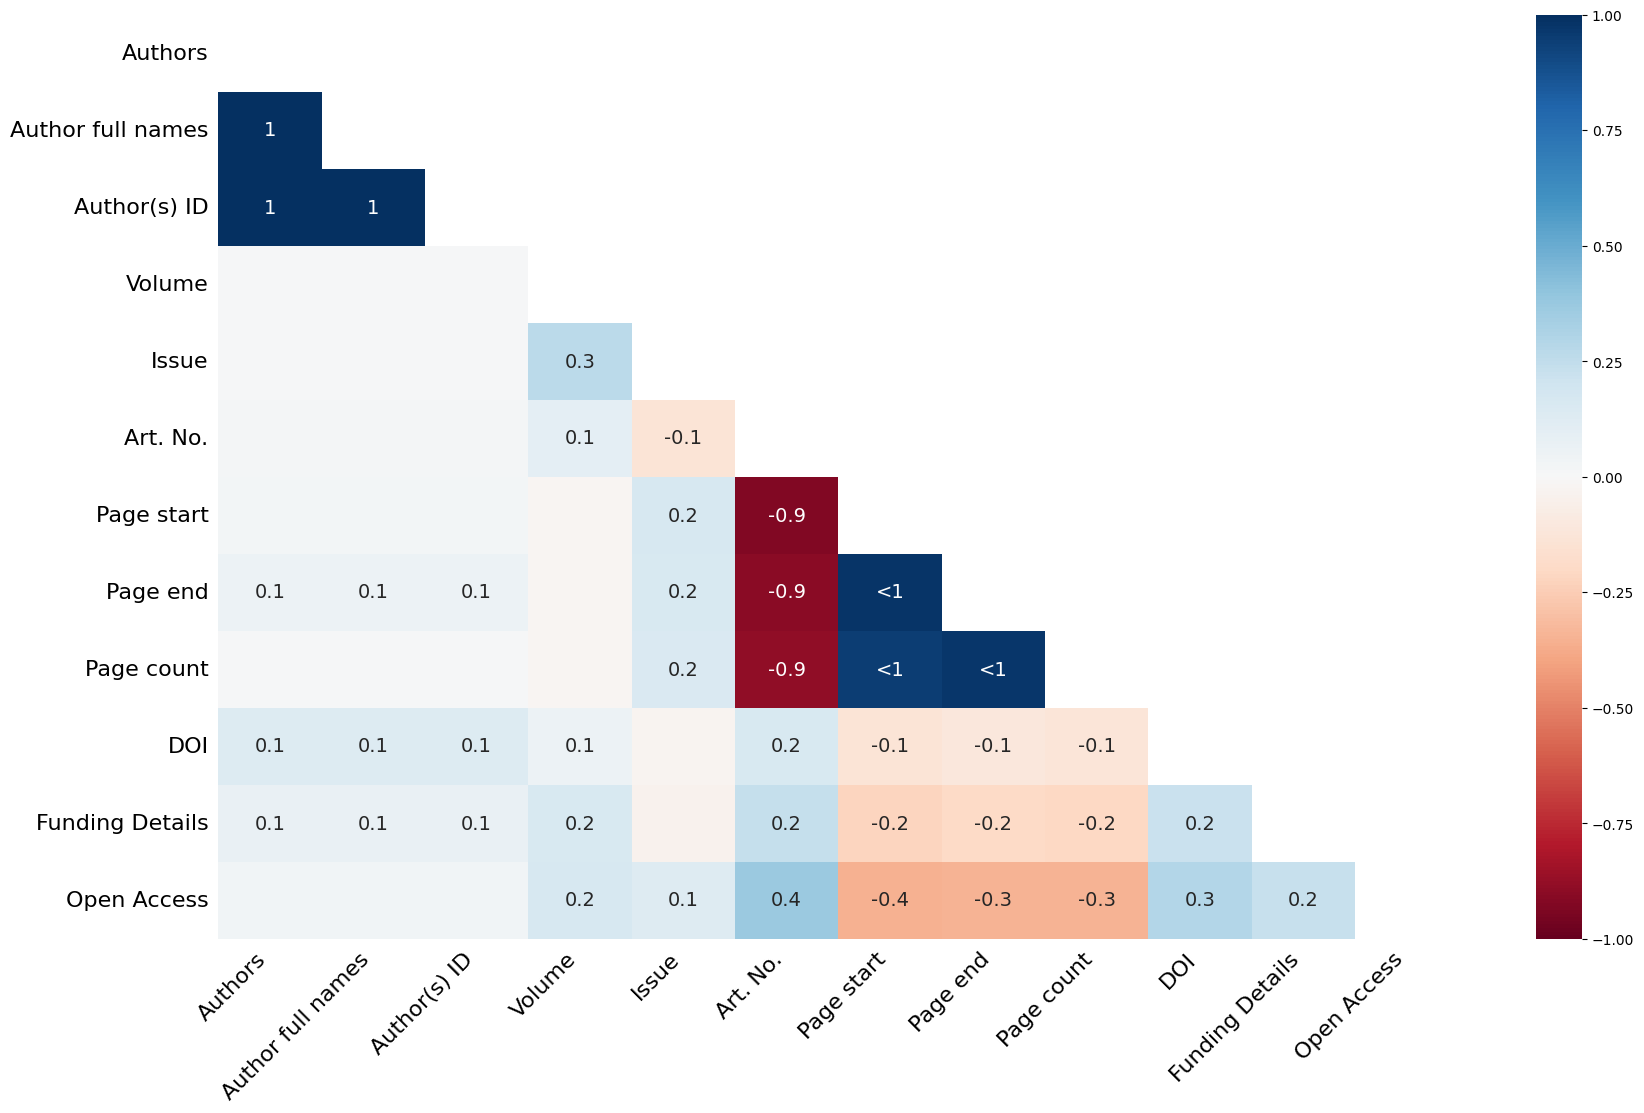

In [43]:
msno.heatmap(mitabla)

<Axes: >

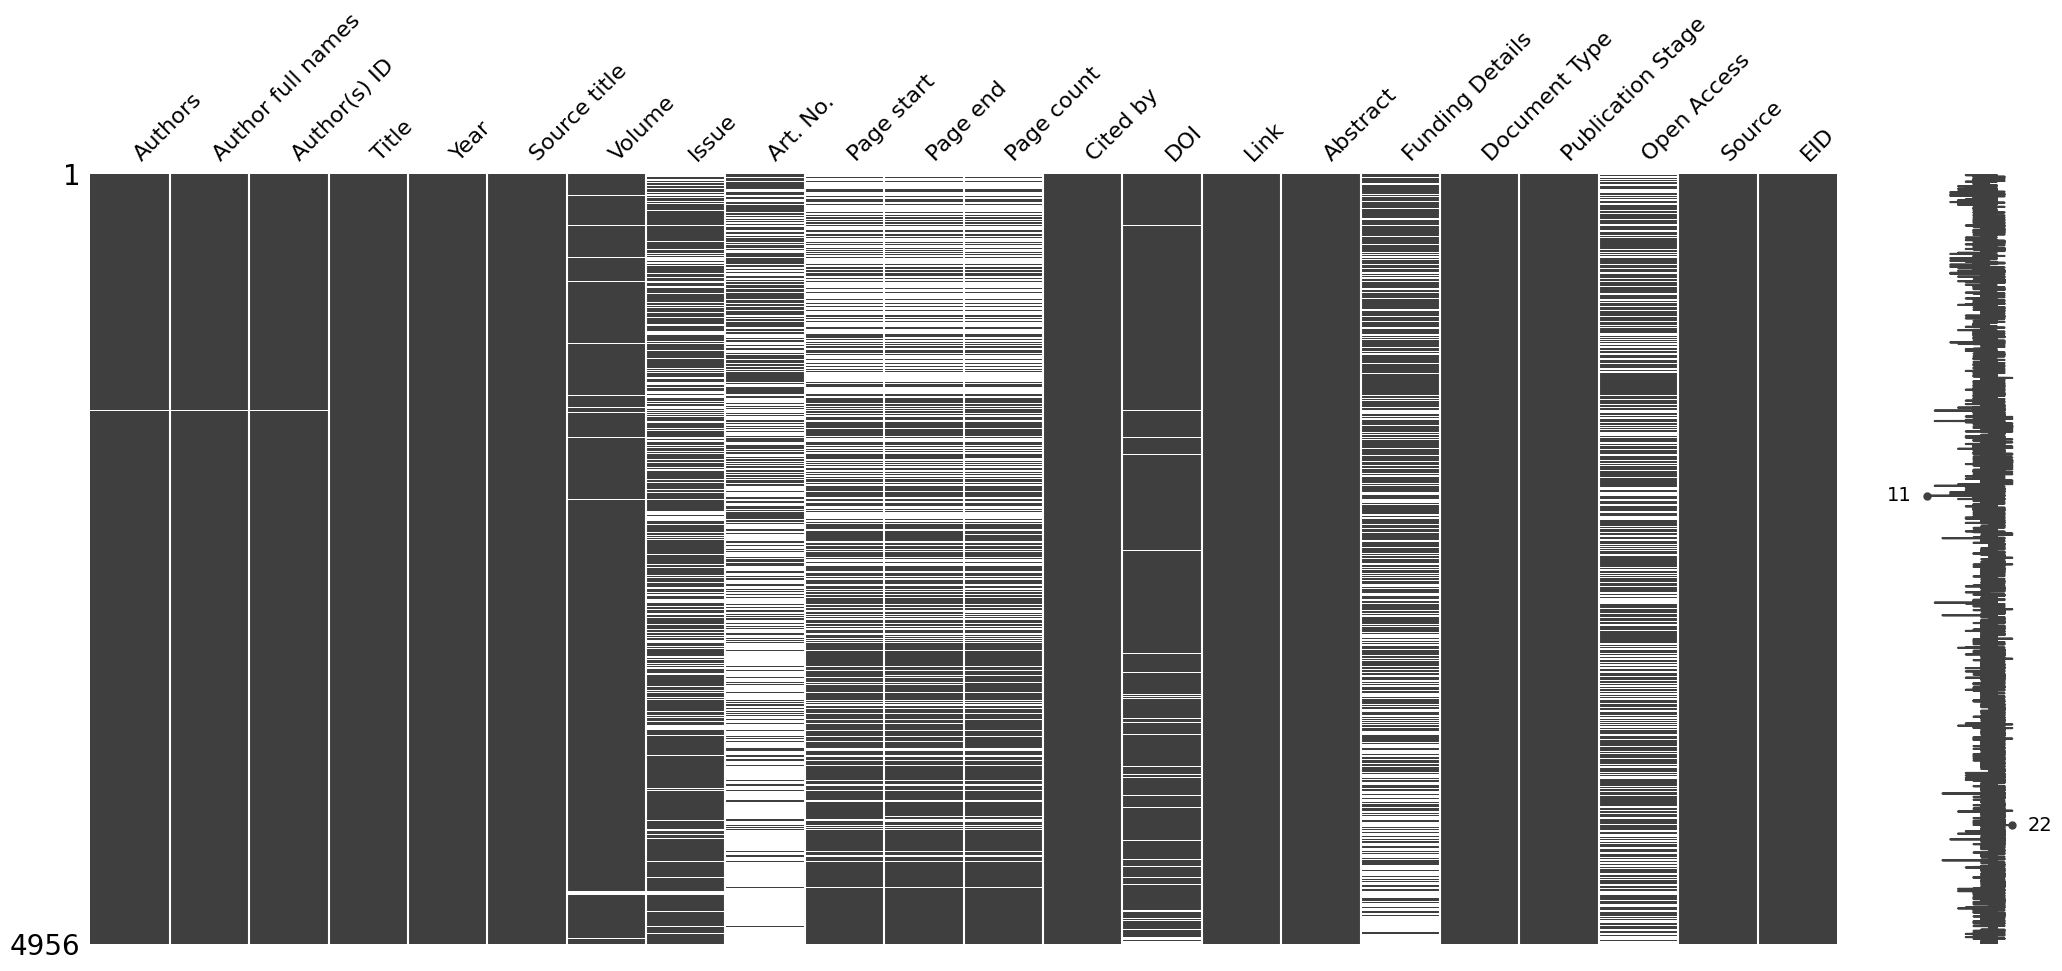

In [42]:
import missingno as msno

msno.matrix(mitabla)

# Presentación:
1. Crea tu página en Github.

2. Sube tu COLAB con los resultados de la actividad.

3. Emplea VBA para crear tu presentación en PowerPoint y adjúntala.

In [44]:
# importo la tabla desde Github y guardo en la variable ds
ds = pd.read_csv("https://raw.githubusercontent.com/inefable12/DUPD_2024/main/scopus.csv")

In [46]:
# de mi tabla en ds voy a guardar solamente los articulos 0,1,2 en una nueva
# variable df
df = ds.iloc[0:3]

In [47]:
df

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Cited by,DOI,Link,Abstract,Funding Details,Document Type,Publication Stage,Open Access,Source,EID
0,Lim C.M.; Lal S.K.; Isa N.M.; Omar A.R.; Choo ...,"Lim, Chie Min (58293538800); Lal, Sunil Kumar ...",58293538800; 7203074991; 58927564900; 72028640...,Betacyanins from red pitahaya (Hylocereus poly...,2024,Heliyon,10,12,e33049,NaN,...,0,10.1016/j.heliyon.2024.e33049,https://www.scopus.com/inward/record.uri?eid=2...,Seasonal influenza affects millions of lives w...,"Ministry of Higher Education, Malaysia, MOHE",Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85196294235
1,Hao J.; Zhang X.; Hu R.; Lu X.; Wang H.; Li Y....,"Hao, JinFang (59164972400); Zhang, Xiaoyan (56...",59164972400; 56033384800; 59167456200; 5916756...,Metabolomics combined with network pharmacolog...,2024,Journal of Translational Medicine,22,1,555,NaN,...,0,10.1186/s12967-024-05355-9,https://www.scopus.com/inward/record.uri?eid=2...,"Background: Astragaloside IV (AST-IV), as an e...",Mega Research and Development Projects of Lüli...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85195625440
2,Kim S.-R.; Lee J.-M.; Kang H.J.; Ryou J.; Shim...,"Kim, Seong-Ryeol (57054781500); Lee, Jung-Min ...",57054781500; 59167499700; 59167429600; 1405490...,Antiviral activity of pimecrolimus against den...,2024,Scientific Reports,14,1,13303,NaN,...,0,10.1038/s41598-024-61127-x,https://www.scopus.com/inward/record.uri?eid=2...,Dengue virus (DENV) infection is a public heal...,"Korea National Institute of Health, KNIH, (202...",Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85195629120


In [48]:
def consultas(input):
  messages = [
    {"role"   : "system",
     "content": context1},
    {"role"   : "user",
     "content": "Eres un especialista en Dengue, simulaciones moleculares y en análisis de texto científico: ¿Cuál es el principal descubrimiento o aporte de este artículo en su área de investigación?"},
  ]

  prompt = pipeline.tokenizer.apply_chat_template(
          messages,
          tokenize=False,
          add_generation_prompt=True
  )

  terminators = [
      pipeline.tokenizer.eos_token_id,
      pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
  ]

  outputs = pipeline(
      prompt,
      max_new_tokens=256,
      eos_token_id=terminators,
      do_sample=True,
      temperature=0.6,
      top_p=0.9,
  )

  return outputs[0]["generated_text"][len(prompt):]

In [49]:
df['Analisis1'] = None

for i in range(3):
  context1 = df["Abstract"][i]
  response = consultas(context1)
  df['Analisis1'][i] = response

<ipython-input-49-4dfbb1af5bba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analisis1'] = None
<ipython-input-49-4dfbb1af5bba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analisis1'][i] = response
<ipython-input-49-4dfbb1af5bba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analisis1'][i] = response
<ipython-input-49-4dfbb1af5bba>:6: SettingWithCopyWarnin

In [50]:
df

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,DOI,Link,Abstract,Funding Details,Document Type,Publication Stage,Open Access,Source,EID,Analisis1
0,Lim C.M.; Lal S.K.; Isa N.M.; Omar A.R.; Choo ...,"Lim, Chie Min (58293538800); Lal, Sunil Kumar ...",58293538800; 7203074991; 58927564900; 72028640...,Betacyanins from red pitahaya (Hylocereus poly...,2024,Heliyon,10,12,e33049,NaN,...,10.1016/j.heliyon.2024.e33049,https://www.scopus.com/inward/record.uri?eid=2...,Seasonal influenza affects millions of lives w...,"Ministry of Higher Education, Malaysia, MOHE",Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85196294235,"Como especialista en Dengue, simulaciones mole..."
1,Hao J.; Zhang X.; Hu R.; Lu X.; Wang H.; Li Y....,"Hao, JinFang (59164972400); Zhang, Xiaoyan (56...",59164972400; 56033384800; 59167456200; 5916756...,Metabolomics combined with network pharmacolog...,2024,Journal of Translational Medicine,22,1,555,NaN,...,10.1186/s12967-024-05355-9,https://www.scopus.com/inward/record.uri?eid=2...,"Background: Astragaloside IV (AST-IV), as an e...",Mega Research and Development Projects of Lüli...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85195625440,"As a specialist in Dengue, molecular simulatio..."
2,Kim S.-R.; Lee J.-M.; Kang H.J.; Ryou J.; Shim...,"Kim, Seong-Ryeol (57054781500); Lee, Jung-Min ...",57054781500; 59167499700; 59167429600; 1405490...,Antiviral activity of pimecrolimus against den...,2024,Scientific Reports,14,1,13303,NaN,...,10.1038/s41598-024-61127-x,https://www.scopus.com/inward/record.uri?eid=2...,Dengue virus (DENV) infection is a public heal...,"Korea National Institute of Health, KNIH, (202...",Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85195629120,"Como especialista en Dengue, simulaciones mole..."


In [ ]:
df

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,DOI,Link,Abstract,Funding Details,Document Type,Publication Stage,Open Access,Source,EID,Analisis1
0,Lim C.M.; Lal S.K.; Isa N.M.; Omar A.R.; Choo ...,"Lim, Chie Min (58293538800); Lal, Sunil Kumar ...",58293538800; 7203074991; 58927564900; 72028640...,Betacyanins from red pitahaya (Hylocereus poly...,2024,Heliyon,10,12,e33049,NaN,...,10.1016/j.heliyon.2024.e33049,https://www.scopus.com/inward/record.uri?eid=2...,Seasonal influenza affects millions of lives w...,"Ministry of Higher Education, Malaysia, MOHE",Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85196294235,"Como especialista en Dengue, simulaciones mole..."
1,Hao J.; Zhang X.; Hu R.; Lu X.; Wang H.; Li Y....,"Hao, JinFang (59164972400); Zhang, Xiaoyan (56...",59164972400; 56033384800; 59167456200; 5916756...,Metabolomics combined with network pharmacolog...,2024,Journal of Translational Medicine,22,1,555,NaN,...,10.1186/s12967-024-05355-9,https://www.scopus.com/inward/record.uri?eid=2...,"Background: Astragaloside IV (AST-IV), as an e...",Mega Research and Development Projects of Lüli...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85195625440,"Como especialista en Dengue, simulaciones mole..."
2,Kim S.-R.; Lee J.-M.; Kang H.J.; Ryou J.; Shim...,"Kim, Seong-Ryeol (57054781500); Lee, Jung-Min ...",57054781500; 59167499700; 59167429600; 1405490...,Antiviral activity of pimecrolimus against den...,2024,Scientific Reports,14,1,13303,NaN,...,10.1038/s41598-024-61127-x,https://www.scopus.com/inward/record.uri?eid=2...,Dengue virus (DENV) infection is a public heal...,"Korea National Institute of Health, KNIH, (202...",Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85195629120,"Como especialista en Dengue, simulaciones mole..."


In [51]:
df["Analisis1"][0]

'Como especialista en Dengue, simulaciones moleculares y análisis de texto científico, me alegra analizar este artículo y destacar el principal descubrimiento o aporte en mi área de investigación.\n\nEl artículo reporta el descubrimiento de que los betacyaninas extraídos de la pitahaya roja (Hylocereus polyrhizus) tienen actividad antiviral contra el virus de la influenza A (IAV) en células epiteliales pulmonares A549. Esto es un aporte significativo en mi área de investigación porque:\n\n1. La mayoría de los estudios sobre betacyaninas se han enfocado en su actividad antiviral contra el virus de la dengue, y no contra otros virus, como el IAV.\n2. El descubrimiento de la actividad antiviral de los betacyaninas contra el IAV abre nuevas posibilidades para el desarrollo de terapias antivirales contra la influenza.\n3. La capacidad de los betacyaninas para reducir la expresión de proteínas y ARN nucleoprotein del IAV sugiere que pueden interferir en la replicación viral, lo que es un me'

In [ ]:
df["Analisis1"][0]

'Como especialista en Dengue, simulaciones moleculares y análisis de texto científico, me alegra analizar este artículo y destacar el principal descubrimiento o aporte en mi área de investigación.\n\nEl artículo describe el estudio de la actividad antiviral de betacyaninas extraídas de la pitahaya roja (Hylocereus polyrhizus) contra el virus de la influenza A (IAV) en células epiteliales pulmonares A549. Aunque el artículo se centra en la actividad antiviral de betacyaninas contra el IAV, hay un aporte importante en mi área de investigación relacionado con el Dengue.\n\nEl descubrimiento principal es que las betacyaninas pueden tener actividad antiviral contra el IAV, lo que sugiere que pueden ser un nuevo tipo de tratamiento para la influenza. Esto es relevante para mi área de investigación en Dengue porque los mecanismos de infección y replicación de los virus de la influenza y del Dengue son similares. Por lo tanto, la investigación sobre la actividad antiviral de betacyaninas contr

In [ ]:
df["Analisis1"][1]

'Como especialista en Dengue, simulaciones moleculares y análisis de texto científico, me parece interesante destacar que este artículo presenta un descubrimiento significativo en la investigación sobre el virus del dengue y la búsqueda de tratamientos efectivos.\n\nEl principal aporte de este artículo es la identificación de Astragaloside IV (AST-IV) como un inhibidor potencial del replicación del virus del dengue. La investigación demostró que AST-IV puede inhibir la replicación del virus del dengue al activar la vía de señalización PI3K-AKT y reducir la apoptosis inducida por el virus.\n\nAdemás, el artículo presenta una visión más amplia de la posible mecanismo de acción de AST-IV, que involucra la modulación de la respuesta antioxidante y la activación de la vía de señalización PI3K-AKT. Esto sugiere que AST-IV puede ser un candidato prometedor para el desarrollo de tratamientos contra el dengue.\n\nEn cuanto a la simulación molecular, el artículo no presenta resultados específico

In [ ]:
df["Analisis1"][2]

'Como especialista en Dengue, simulaciones moleculares y análisis de texto científico, me parece interesante destacar que el principal descubrimiento o aporte de este artículo es la identificación de pimecrolimus como un potencial fármaco antiviral para el tratamiento de la infección por el virus del Dengue tipo 2 (DENV2).\n\nEl artículo presenta una investigación exhaustiva que incluye ensayos in vitro y in vivo, donde se demuestra que pimecrolimus inhibe la replicación del virus y reduce la carga viral en células y en un modelo de infección experimental en ratones. Esto sugiere que pimecrolimus puede ser un candidato prometedor para el tratamiento de la dengue, una enfermedad grave que no tiene tratamiento antiviral efectivo actualmente.\n\nEl aporte más significativo de este artículo es que pimecrolimus puede ser utilizado en la fase inicial del ciclo de replicación del virus, lo que sugiere que puede ser un tratamiento efectivo para prevenir la progresión de la enfermedad. Además, 

Asignar puntuación

In [52]:
def puntuacion(input):
  messages = [
    {"role"   : "system",
     "content": context1},
    {"role"   : "user",
     "content": "Eres un especialista en Dengue, simulaciones moleculares y en análisis de texto científico:, puntúa con 1 si se realizan simulaciones moleculares y con 0 si no se usan las simulaciones moleculares como por ejemplo, química cuantica, docking molecular, dinámica molecular, ADMET, etc, imprime solamente el número de la puntuacion de: "},
  ]

  prompt = pipeline.tokenizer.apply_chat_template(
          messages,
          tokenize=False,
          add_generation_prompt=True
  )

  terminators = [
      pipeline.tokenizer.eos_token_id,
      pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
  ]

  outputs = pipeline(
      prompt,
      max_new_tokens=256,
      eos_token_id=terminators,
      do_sample=True,
      temperature=0.6,
      top_p=0.9,
  )

  return outputs[0]["generated_text"][len(prompt):]

In [ ]:
df

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Link,Abstract,Funding Details,Document Type,Publication Stage,Open Access,Source,EID,Analisis1,Analisis2
0,Lim C.M.; Lal S.K.; Isa N.M.; Omar A.R.; Choo ...,"Lim, Chie Min (58293538800); Lal, Sunil Kumar ...",58293538800; 7203074991; 58927564900; 72028640...,Betacyanins from red pitahaya (Hylocereus poly...,2024,Heliyon,10,12,e33049,NaN,...,https://www.scopus.com/inward/record.uri?eid=2...,Seasonal influenza affects millions of lives w...,"Ministry of Higher Education, Malaysia, MOHE",Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85196294235,"Como especialista en Dengue, simulaciones mole...",1
1,Hao J.; Zhang X.; Hu R.; Lu X.; Wang H.; Li Y....,"Hao, JinFang (59164972400); Zhang, Xiaoyan (56...",59164972400; 56033384800; 59167456200; 5916756...,Metabolomics combined with network pharmacolog...,2024,Journal of Translational Medicine,22,1,555,NaN,...,https://www.scopus.com/inward/record.uri?eid=2...,"Background: Astragaloside IV (AST-IV), as an e...",Mega Research and Development Projects of Lüli...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85195625440,"Como especialista en Dengue, simulaciones mole...",1
2,Kim S.-R.; Lee J.-M.; Kang H.J.; Ryou J.; Shim...,"Kim, Seong-Ryeol (57054781500); Lee, Jung-Min ...",57054781500; 59167499700; 59167429600; 1405490...,Antiviral activity of pimecrolimus against den...,2024,Scientific Reports,14,1,13303,NaN,...,https://www.scopus.com/inward/record.uri?eid=2...,Dengue virus (DENV) infection is a public heal...,"Korea National Institute of Health, KNIH, (202...",Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85195629120,"Como especialista en Dengue, simulaciones mole...",1


In [53]:
df.to_csv("jesus.csv")